In [2]:
import pandas as pd

df = pd.read_csv('../inspection_data/data_50Hz.csv')
df.head()

,success,actual_time,optimal_time,world_idx,timestep,goal_x,goal_y,lidar_0,lidar_1,lidar_2,...,lidar_359,pos_x,pos_y,pose_heading,twist_linear,twist_angular,cmd_vel_linear,cmd_vel_angular,local_goal_x,local_goal_y
0,True,11.53,6.776516,0,0,0.0,10.0,2.953487,2.869737,2.848471,...,3.010891,-0.000056,0.001010,1.547277,0.015216,0.004864,0.09,0.013916,0.997539,0.073423
1,True,11.53,6.776516,0,1,0.0,10.0,2.956702,2.871896,2.849361,...,3.011203,-0.000025,0.002372,1.547351,0.038166,0.012513,0.12,0.018555,1.021175,0.073934
2,True,11.53,6.776516,0,2,0.0,10.0,2.958278,2.869057,2.851222,...,3.013201,0.000020,0.004364,1.547393,0.065010,0.006605,0.15,0.023194,1.019185,0.073891
3,True,11.53,6.776516,0,3,0.0,10.0,2.960670,2.870363,2.851820,...,3.010752,0.000080,0.006967,1.547525,0.093685,0.022431,0.18,0.011172,1.016592,0.073756
4,True,11.53,6.776516,0,4,0.0,10.0,2.962370,2.871268,2.855664,...,3.011739,0.000154,0.010177,1.547590,0.123362,0.008801,0.21,0.013033,1.013386,0.073689


In [3]:
df['success'].value_counts()

success
True     554973
False     51347
Name: count, dtype: int64

In [4]:
df[df['timestep']==0]['success'].value_counts()

success
True     900
False    141
Name: count, dtype: int64

In [5]:
# calculate the success rate
df[df['timestep']==0]['success'].value_counts(normalize=True)

success
True     0.864553
False    0.135447
Name: proportion, dtype: float64

In [6]:
# calculate the success rate first run of every world_idx
df[df['timestep']==0].groupby('world_idx')['success'].first().value_counts(normalize=True)

success
True     0.97
False    0.03
Name: proportion, dtype: float64

<Axes: >

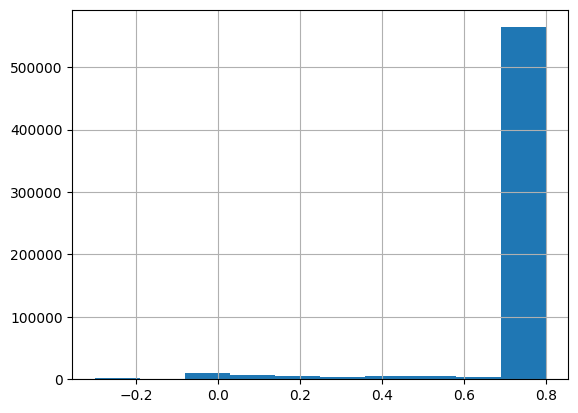

In [7]:
# plot histogram of the data
df['cmd_vel_linear'].hist()

<Axes: >

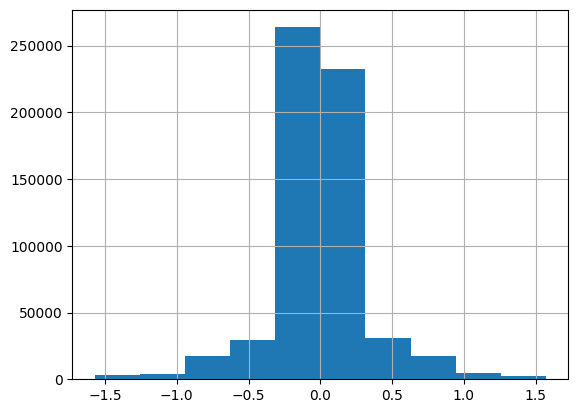

In [8]:
df['cmd_vel_angular'].hist()

In [9]:
# remove success == False
df = df[df['success'] == True]

In [10]:
print(df[df.isnull().any(axis=1)])

Empty DataFrame
Columns: [success, actual_time, optimal_time, world_idx, timestep, goal_x, goal_y, lidar_0, lidar_1, lidar_2, lidar_3, lidar_4, lidar_5, lidar_6, lidar_7, lidar_8, lidar_9, lidar_10, lidar_11, lidar_12, lidar_13, lidar_14, lidar_15, lidar_16, lidar_17, lidar_18, lidar_19, lidar_20, lidar_21, lidar_22, lidar_23, lidar_24, lidar_25, lidar_26, lidar_27, lidar_28, lidar_29, lidar_30, lidar_31, lidar_32, lidar_33, lidar_34, lidar_35, lidar_36, lidar_37, lidar_38, lidar_39, lidar_40, lidar_41, lidar_42, lidar_43, lidar_44, lidar_45, lidar_46, lidar_47, lidar_48, lidar_49, lidar_50, lidar_51, lidar_52, lidar_53, lidar_54, lidar_55, lidar_56, lidar_57, lidar_58, lidar_59, lidar_60, lidar_61, lidar_62, lidar_63, lidar_64, lidar_65, lidar_66, lidar_67, lidar_68, lidar_69, lidar_70, lidar_71, lidar_72, lidar_73, lidar_74, lidar_75, lidar_76, lidar_77, lidar_78, lidar_79, lidar_80, lidar_81, lidar_82, lidar_83, lidar_84, lidar_85, lidar_86, lidar_87, lidar_88, lidar_89, lidar_90, l

In [11]:
df.describe()

,actual_time,optimal_time,world_idx,timestep,goal_x,goal_y,lidar_0,lidar_1,lidar_2,lidar_3,...,lidar_359,pos_x,pos_y,pose_heading,twist_linear,twist_angular,cmd_vel_linear,cmd_vel_angular,local_goal_x,local_goal_y
count,554973.000000,554973.000000,554973.000000,554973.000000,554973.0,554973.0,554973.000000,554973.000000,554973.000000,554973.000000,...,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000,554973.000000
mean,12.259048,5.716841,151.319140,313.696198,0.0,10.0,2.626697,2.610495,2.594688,2.580224,...,2.570933,-0.026526,4.470110,1.549228,0.775685,-0.000481,0.776109,-0.001090,0.977993,0.001147
std,2.273365,0.373244,86.703978,192.859723,0.0,0.0,1.296723,1.294866,1.293297,1.293029,...,1.310691,0.573949,2.647403,0.413160,0.124030,0.316548,0.119066,0.290502,0.152300,0.207453
min,11.165000,5.012248,0.000000,0.000000,0.0,10.0,0.292027,0.287642,0.285270,0.281570,...,0.217051,-1.811188,0.000263,-3.141152,-0.318413,-2.506347,-0.300000,-1.570796,-1.024131,-1.025240
25%,11.404000,5.449447,77.000000,154.000000,0.0,10.0,1.538159,1.527395,1.516633,1.505974,...,1.476724,-0.378162,2.188165,1.436482,0.800021,-0.083711,0.800000,-0.089032,0.998515,-0.058111
50%,11.612000,5.628741,151.000000,308.000000,0.0,10.0,2.648689,2.628465,2.607874,2.588119,...,2.566847,-0.030590,4.385300,1.585563,0.800496,-0.002824,0.800000,-0.007541,1.006663,-0.003594
75%,12.027000,5.923911,227.000000,462.000000,0.0,10.0,3.427153,3.398267,3.370909,3.345454,...,3.367440,0.312517,6.744542,1.710501,0.801997,0.061823,0.800000,0.069420,1.014649,0.050435
max,33.139000,6.930695,299.000000,1670.000000,0.0,10.0,5.000000,5.000000,5.000000,5.000000,...,5.000000,1.894076,9.340227,3.141573,0.821323,2.281988,0.800000,1.570796,1.051611,1.023490


In [12]:
# only take success == True
df = df[df['success'] == True]

# calculate the average episode length
df.groupby('world_idx')['timestep'].max().mean()

635.53

<Axes: >

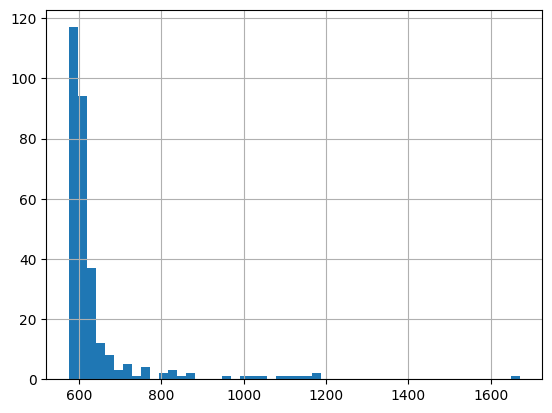

In [16]:
# histogram of the episode length
df.groupby('world_idx')['timestep'].max().hist(bins=50)

In [14]:
# calculate the number of unsuccessful group by world_idx
df['success'].value_counts()

success
True    554973
Name: count, dtype: int64

In [15]:
len(df[df['timestep']==0])

900